# Practice Session 09: Spectral graph analysis

In this session we will use [NetworkX](https://networkx.github.io/) to review some concepts of spectral graph theory.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [1]:
# LEAVE AS-IS

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sparse
import scipy.sparse.linalg as linalg

# Disable warnings about future changes
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 1. Compute graph Laplacian

The dataset we will use is contained in file `starwars.graphml` that you will find in our [data](https://github.com/chatox/networks-science-course/tree/master/practicum/data) directory:

This graph represents relationships between characters in the Star Wars sage. The following code just loads the graph into variable *sw*. Leave as-is.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [2]:
# LEAVE AS-IS

INPUT_GRAPH_FILENAME = "starwars.graphml"

# Read the graph in GraphML format
sw_in = nx.read_graphml(INPUT_GRAPH_FILENAME)

# Re-label the nodes so they use the 'name' as label
sw_relabeled = nx.relabel.relabel_nodes(sw_in, dict(sw_in.nodes(data='name')))

# Convert the graph to undirected
sw = sw_relabeled.to_undirected()

The following code draws the graph.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

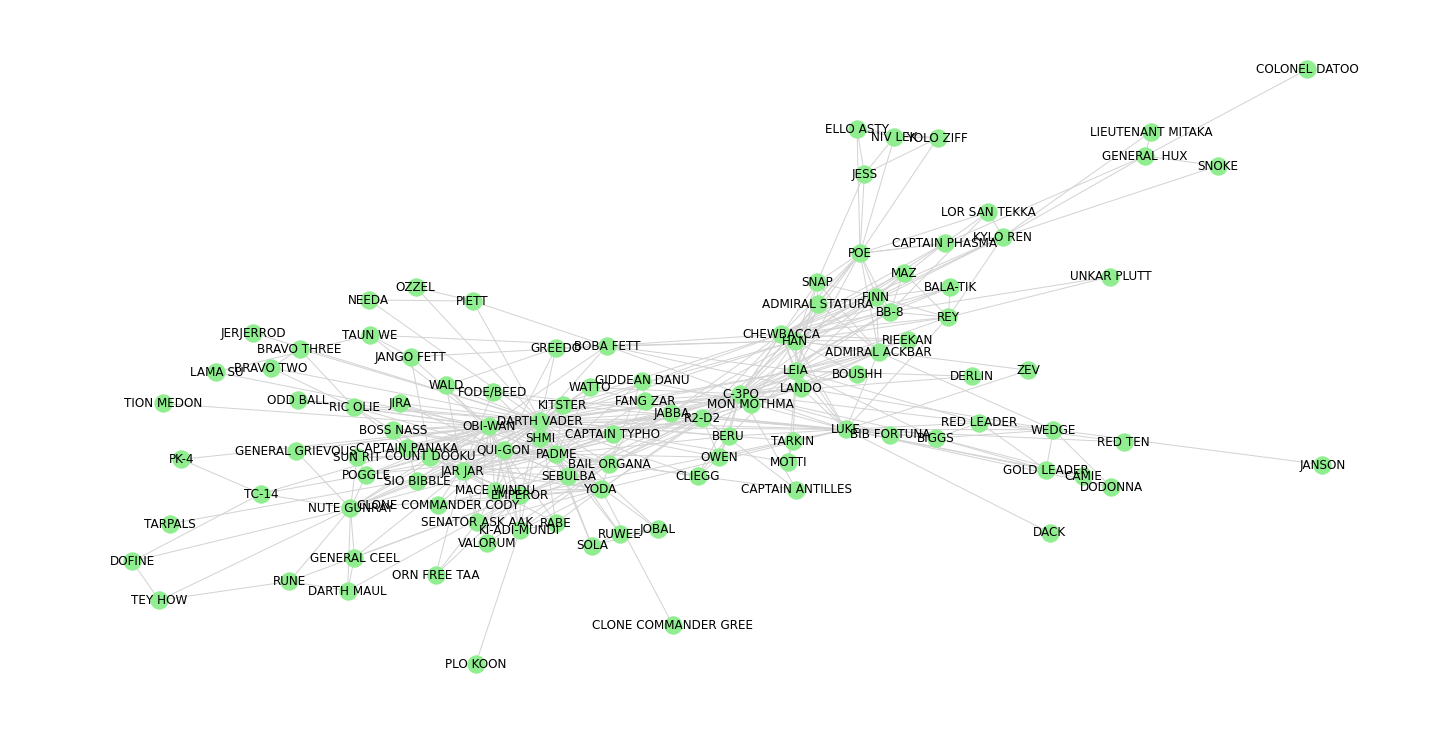

In [3]:
# LEAVE AS-IS

plt.figure(figsize=(20, 10))
nx.draw_spring(sw, with_labels=True, node_color='lightgreen', edge_color='lightgrey')
plt.show()

Compute the Laplacian of this graph: *L = D - A*, where *D* is a diagonal matrix containing the degree of the nodes, and *A* is the adjacency matrix of the graph.

We will use [SciPy sparse matrices](https://docs.scipy.org/doc/scipy/reference/sparse.html), which are efficient representations of matrices. For simplicity, we will use the list-of-list implementation, in which one creates matrices using `M = sparse.lil_matrix((rows, columns))`. To read or write position *(i,j)* in *M*, we simply use *M[i,j]*.

Rows and columns in all matrices should be in the same order of nodes given by `list(g.nodes())`.

1. Create a function `diagonal_degree_matrix(g)` that has zeros everywhere except in the diagonal in which *D[i,i]* is equivalent to the degree of node *i*.
1. Create a function `adjacency_matrix(g)` that at position *(i,j)* is *1* if there is a link between nodes *i* and *j*, and *0* if there is no link.
1. Create a function `laplacian(g)` that computes the graph's Laplacian using the two functions above. 

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code for `diagonal_degree_matrix`, `adjacency_matrix`, and `laplacian`</font>

The following cell, that you should leave as-is, tests your code by comparing against NetworkX's built-in functions.

If any of your matrices is not correctly generated, it might be helpful to check first whether the dimensions are the same, and then check the contents. To print the entire contents of matrix *M* without truncation, you can use:

```python
with np.printoptions(threshold=np.inf):
    print(M.todense())
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [5]:
# LEAVE AS-IS

def test_equality_matrices(A, B):
    
    # Check equality element-wise using dense matrices comparison
    return np.array_equal(A.todense(), B.todense())

# Test adjacency matrix

A = adjacency_matrix(sw)
Anx = nx.adjacency_matrix(sw)

if test_equality_matrices(A, Anx):
    print("OK - Adjacency matrix correctly generated")
else:
    print("FAIL - Your adjacency matrix is not equal to the one generated by NetworkX")

# Test Laplacian matrix

L = laplacian(sw)
Lnx = nx.laplacian_matrix(sw)
                
if test_equality_matrices(L, Lnx):
    print("OK - Laplacian matrix correctly generated")
else:
    print("FAIL - Your Laplacian matrix is not equal to the one generated by NetworkX")

OK - Adjacency matrix correctly generated
OK - Laplacian matrix correctly generated


# 2. Compute eigenvectors to layout a lattice graph

This part is inspired by a Python notebook accompanying [chapter 5](https://caam37830.github.io/book/05_graphs/spectral.html) of the book **[Scientific Computing with Python](https://caam37830.github.io/book/)**

We will explore a square [lattice graph](https://en.wikipedia.org/wiki/Lattice_graph), also known as grid or mesh. 

The following cells, which you should leave as-is, create a lattice and plots it four times.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

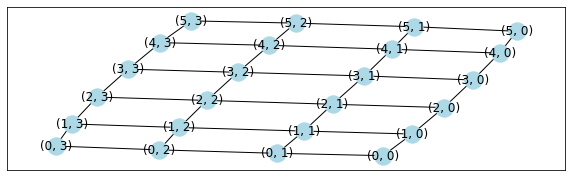

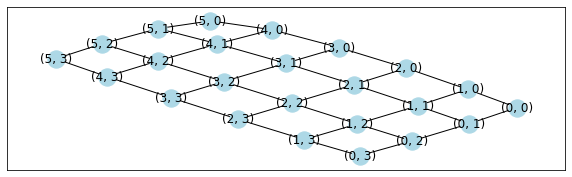

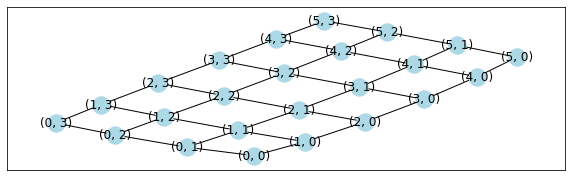

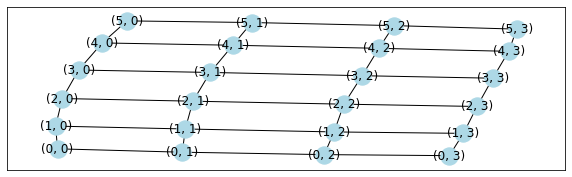

In [6]:
# LEAVE AS-IS

Ggrid = nx.grid_2d_graph(6,4)

for i in range(4):
    plt.figure(figsize=(10, 3))
    nx.draw_networkx(Ggrid, with_labels=True, node_color='lightblue')
    plt.show()

The lattice is [planar](https://en.wikipedia.org/wiki/Planar_graph) and therefore can be drawn without edges crossing. The default [drawing](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html) function of NetworkX sometimes "twists" the drawing in a way that is unnecessary.

Instead, we would like to display it properly in a consistent manner. We will do it by creating the **spectrum of the graph**.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

# 2.1. Obtain the spectrum of the graph

This graph is connected so its smallest eigenvalue is 0. We will use the eigenvectors associated to the second smaller and third smaller eigenvalues. To obtain these from a matrix M, we use:

```python
eigenvalues, eigenvectors = sparse.linalg.eigs(M, k=3, which='SM')
```

* [sparse.linalg.eigsh](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.eigs.html) computes eigenvalues and eigenvectors of real symmetric square matrices (or complex square matrices as long as they are [Hermitian](https://en.wikipedia.org/wiki/Hermitian_matrix))
* *M* is a square matrix in a sparse representation.
* *k=3* is the number of eigenvectors we want, in our case *3*. The first one we know it will be a constant vector, we care about the second and third.
* *which='SM'* indicates that we want the **SM**allest values.

In the result:

* *eigenvalues* contains the eigenvalues
* *eigenvectors* contains the eigenvectors
   * `eigenvectors[:,0]` is the eigenvector of the smallest eigenvalue, it should be constant and associated to eigenvalue 0 if M is a Laplacian of a connected graph
   * `eigenvectors[:,1]` is the eigenvector of the second smallest eigenvalue
   * `eigenvectors[:,2]` is the eigenvector of the third smallest eigenvalue

The next cell, which you can leave as-is, obtains these vectors for the lattice graph.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [7]:
# LEAVE AS-IS

# Obtain three eigenvalues and eigenvectors
eigenvalues, eigenvectors = linalg.eigsh(laplacian(Ggrid), k=3, which='SM')

#  The three eigenvectors
first_eigenvector = eigenvectors[:,0]
X_positions = eigenvectors[:,1]
Y_positions = eigenvectors[:,2]

# The first eigenvector should be constant
print("First eigenvector (should be constant):")
print(first_eigenvector)
print()

# Print coordinates
print("Second (X positions) and third (Y positions) eigenvector:")
print(X_positions)
print(Y_positions)

First eigenvector (should be constant):
[0.20412415 0.20412415 0.20412415 0.20412415 0.20412415 0.20412415
 0.20412415 0.20412415 0.20412415 0.20412415 0.20412415 0.20412415
 0.20412415 0.20412415 0.20412415 0.20412415 0.20412415 0.20412415
 0.20412415 0.20412415 0.20412415 0.20412415 0.20412415 0.20412415]

Second (X positions) and third (Y positions) eigenvector:
[ 0.27883877  0.27883877  0.27883877  0.27883877  0.20412415  0.20412415
  0.20412415  0.20412415  0.07471462  0.07471462  0.07471462  0.07471462
 -0.07471462 -0.07471462 -0.07471462 -0.07471462 -0.20412415 -0.20412415
 -0.20412415 -0.20412415 -0.27883877 -0.27883877 -0.27883877 -0.27883877]
[ 0.26670105  0.11047119 -0.11047119 -0.26670105  0.26670105  0.11047119
 -0.11047119 -0.26670105  0.26670105  0.11047119 -0.11047119 -0.26670105
  0.26670105  0.11047119 -0.11047119 -0.26670105  0.26670105  0.11047119
 -0.11047119 -0.26670105  0.26670105  0.11047119 -0.11047119 -0.26670105]


Coordinates are difficult to interpret so we should look at them visually. 

Create a function `spectral_projection()` that returns the X and Y coordinates corresponding to the **spectral graph projection** of a graph, and a function `draw_fixed_positions()` which displays this using [matplotlib.pyplot.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) and the following template:


```python
def spectral_projection(graph, node_color='lightblue'):
     
    # Obtain positions X, Y
    # TO-DO: ADD YOUR CODE HERE
    return X, Y
    
def draw_graph_fixed_positions(graph, X_positions, Y_positions, title, xlabel, ylabel,
                               width=20, height=6, 
                               font_color='white', node_color='black'):
    
    # Create the figure of the given width and height,
    # then add title, xlabel, ylabel
    # TO-DO: ADD YOUR CODE HERE
    
    # Create the dictionary with positions
    pos = {}
    # TO-DO: ADD YOUR CODE HERE
    
    # Draw graph
    _ = nx.draw_networkx(graph, pos=pos, with_labels=True, node_color=node_color, font_color=font_color)
```

*Tip:* the attribute `pos` that networkx expects is a dictionary where each key is a node, and each value is a tuple containing its coordinates. For instance, if the first node should be positioned at *x=1* and *y=3*, we would do:

```python
    nodes = graph.nodes()
    pos[nodes[0]] = (1,3)
```

To create this dictionary one possibility is to iterate from `0` to `len(nodes)`.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

 <font size="+1" color="red">Replace this cell with your code for `spectral_projection` and `draw_graph_fixed_positions`</font>

The following cell, which you should leave as-is, computes and displays the spectral graph projection of the grid graph.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

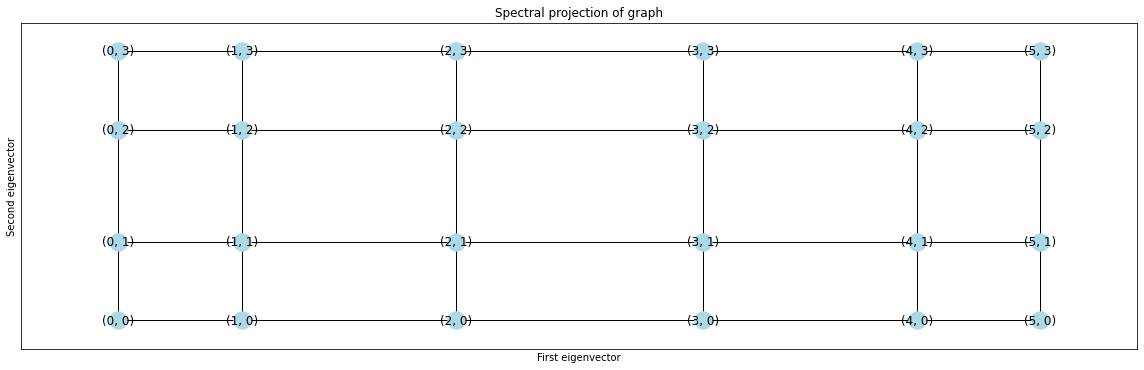

In [9]:
# LEAVE AS-IS

def draw_spectral_projection(g, width=20, height=6, font_color='white', node_color='black'):
    X, Y = spectral_projection(g)
    _ = draw_graph_fixed_positions(g, X, Y, node_color=node_color, font_color=font_color,
                               width=width, height=height,
                               title="Spectral projection of graph", 
                               xlabel="First eigenvector", ylabel="Second eigenvector")
    
draw_spectral_projection(Ggrid, font_color='black', node_color='lightblue')

<font size="+1" color="red">Replace this cell with a brief commentary on what you observe on this plot.</font>

# 3. Spectral graph clustering

A simple way of creating a clustering in a graph is to divide the graph into nodes with `X>0` and `X<0`, in which X is the coordinate given by the eigenvector associated to the second smallest eigenvalue of its Laplacian.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

## 3.1. Clustering of graph generated using the stochastic block model

The [stochastic block model](https://en.wikipedia.org/wiki/Stochastic_block_model) is a variation of the random graph (ER) model that is useful for generating a graph with a given set of communities.

The following cell, which you should leave as-is, creates a graph with two groups, one with *n1* nodes and one with *n2* nodes, with inter- and intra-community connection probabilities given by matrix *P*. We are making intra-community probabilities larger than inter-community probabilities, so that each group tends to form a dense community.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

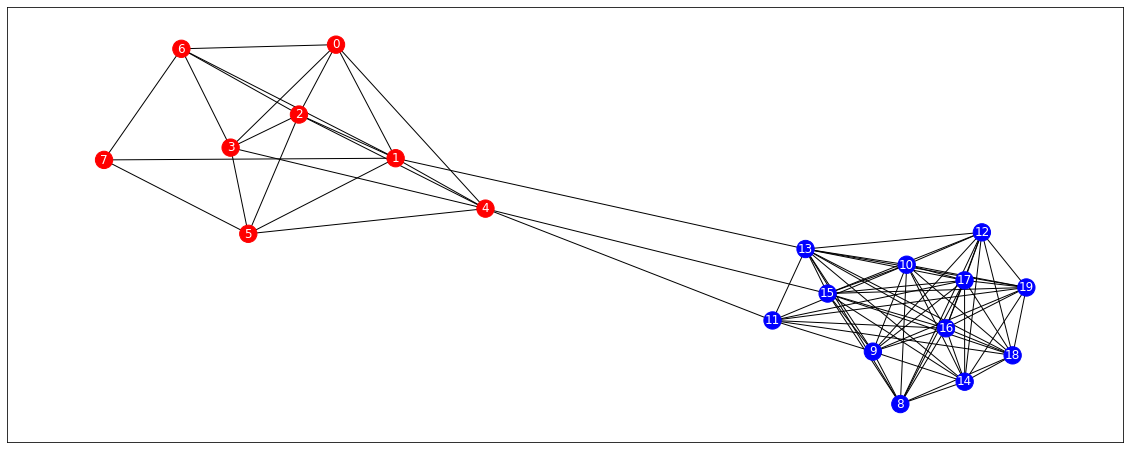

In [10]:
# LEAVE AS-IS

n1 = 8
n2 = 12

P = [
    [0.80, 0.07], # Connecting community 1 to itself, or community 1 to community 2
    [0.07, 0.95]  # Connecting community 2 to community 1, or community 2 to itself
] 
Gblock = nx.stochastic_block_model([n1, n2], P)
assert nx.is_connected(Gblock), "Repeat: generated graph is not connected"

# Draw graph
plt.figure(figsize=(20, 8))
color_vec = ["red" for i in range(n1)] + ["blue" for i in range(n2)] 
nx.draw_networkx(Gblock, with_labels=True, node_color=color_vec, font_color='white')


Display this graph using the `draw_spectral_projection` function. Note that the function accepts an argument `node_color`; this argument can be a vector. Pass `color_vec` as that argument, to plot the nodes according to the community they were created on.

Add a vertical line at X=0 using [axvline](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html)

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code to do a spectral projection of this graph, including a  vertical line at X=0.</font>

<font size="+1" color="red">Replace this cell with a brief commentary indicating what you see in the plot above.</font>

Whether communities can be clearly observed or not depends basically on the matrix *P*. Generate two more graphs, call them `Gblock1`and `Gblock2`, modifying *P* (and potentially also *n1* and *n2*) in such a way that:

* Graph `Gblock1` has a less obvious community structure, and the spectral graph clustering induced by partitioning at X=0 produces at least one error, i.e., leaves at least one node in the size of the wrong color.
* Graph `Gblock2` has an even less obvious community structure, and the spectral graph clustering induced by partitioning at X=0 produces multiple errors.

The following code, which you can leave as-is:

* `generate_connected_block_model_graph`: generates a graph using the stockastic block model and re-tries if the graph is not connected
* `draw_block_model_graph_and_projection`: draws a block model graph and its spectral projection

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [28]:
# LEAVE AS-IS

def generate_connected_block_model_graph(n1, n2, P):
    while True:
        graph = nx.stochastic_block_model([n1, n2], P)

        if nx.is_connected(graph):
            print("Success -- generated graph is connected")
            break
        else:
            print("Not connected, generating again")
            
    return graph

def draw_block_model_graph_and_projection(graph, n1, n2, width=20, height=6,
                                          color1="red", color2="blue", font_color="white"):
    # Create figure
    plt.figure(figsize=(20, 8))
    
    # Create list of colors
    color_vec = [color1 for i in range(n1)] + [color2 for i in range(n2)] 
    
    # Draw spectral projections
    draw_spectral_projection(graph, width=width, height=height, node_color=color_vec, font_color=font_color)
    
    # Add a vertical line at x=0
    _ = plt.axvline(0.0, color='blue')

<font size="+1" color="red">Replace this cell with your code to create `Gblock1` and to draw it. The spectral graph clustering by setting threshold X=0 should have at one node in the "wrong" community.</font>

<font size="+1" color="red">Replace this cell with your code to create `Gblock2` and to draw it. The spectral graph clustering by setting threshold X=0 should have at multiple nodes in the "wrong" community.</font>

<font size="+1" color="red">Replace this cell with a brief commentary on the graphs you have generated.</font>

## 3.3. Clustering of the Game of Thrones graph

The dataset we will use is contained in file `got.graphml` that you will find in our [data](https://github.com/chatox/networks-science-course/tree/master/practicum/data) directory:

This graph represents relationships between characters in the Game of Thrones TV series. It has 84 nodes and 216 links. The following code just loads the *Game of Thrones* graph into variable *got*. Leave as-is.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [31]:
# LEAVE AS-IS

# Load graph
# (If there is an error of 'long' attribute data type,
#  you can change 'long' to 'string' in the "got.graphml" file.)
got = nx.read_graphml("got.graphml")

# Make undirected, removing multi-edges
got = nx.Graph(got)

# Relabel
got = nx.relabel_nodes(got, nx.get_node_attributes(got, 'name'))


In the Game of Thrones graph, which we loaded into variable `got`, nodes have attributes `house`, indicating the family in which a character was born. Additionally, edges are directed and have an attribute `relation`, such as father, mother, sibling, spouse, lover, allegiance, killed, and sometimes (*gasp*!) a combination of those. A sub-graph is shown in the drawing below:

![Game of thrones extract](got.png)

We will extract sub-graphs from Game of Thrones containing characters from a selection of houses/families.

The following auxiliary function, that you should leave as-is, obtains all nodes in `graph` that have the value of `attribute_name` within a list of `attribute_values`.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [32]:
# LEAVE AS-IS

def extract_by_attribute_values(graph, attribute_name, attribute_values):
    
    nodes_to_keep = []
    
    for node, value in nx.get_node_attributes(graph, attribute_name).items():
        if value in attribute_values:
            nodes_to_keep.append(node)
            
    return nodes_to_keep

Create a sub-graph `got_selected` containing only nodes in which the attribute `house` is either *'House Stark'* or *'House Targaryen'*. The resulting graph should have 15 nodes -- verify that.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code to create subgraph `got_selected`.</font>

As you did before, draw this graph using `nx.draw_networkx` and `spectral_projection`.

The following cell provides a variable `colors` that you should use in both drawings, leave as-is.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [34]:
# LEAVE AS-IS

colors = []
house_of = nx.get_node_attributes(got_selected, 'house')

node_sequence = list(got_selected.nodes())
for i in range(len(node_sequence)):
    node = node_sequence[i]
    if house_of[node] == 'House Stark':
        colors.append('orange')
    elif house_of[node] == 'House Targaryen':
        colors.append('lightgreen')
    else:
        assert False

<font size="+1" color="red">Replace this cell with your code to draw the `got_selected` graph and its spectral projection with a vertical line at zero, with nodes colored according to `node_colors`.</font>

<font size="+1" color="red">Replace this cell with a brief commentary about what you see in this projection, and what can you conjecture, based on this graph projection, about the interactions between these two houses in the series. Note that the lead character "Jon Snow" can be considered as born in House Targaryen or House Stark, depending on whether one follows the books or the TV series.</font>

## 3.4. Clustering the Karate Club graph

Finally, cluster the Karate Club graph. The following cell, which you should leave as-is, loads this graph, and initializes a list of colors for each node.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [36]:
# LEAVE AS-IS

# Load the graph and re-label nodes to use attribute "name"
karate = nx.read_graphml("karate.graphml")
karate = nx.relabel_nodes(karate, nx.get_node_attributes(karate, 'name'))

# Ground-truth communities in which the Karate club splitted
karate_communities = {'1': 'A', '2': 'A', '3': 'A', '4': 'A', '5': 'A', '6': 'A',
                      '7': 'A', '8': 'A', '9': 'B', '10': 'B', '11': 'A', '12': 'A',
                      '13': 'A', '14': 'A', '15': 'B', '16': 'B', '17': 'A', '18': 'A',
                      '19': 'B', '20': 'A', '21': 'B', '22': 'A', '23': 'B', '24': 'B',
                      '25': 'B', '26': 'B', '27': 'B', '28': 'B', '29': 'B', '30': 'B',
                      '31': 'B', '32': 'B', '33': 'B', '34': 'B' }

# Colors
communities_to_colors = {'A': 'red', 'B': 'blue'} 
karate_colors = [communities_to_colors[karate_communities[node]] for node in karate.nodes()]


<font size="+1" color="red">Replace this cell with your code to draw the graph and its projection as done above, using the colors provided.</font>

<font size="+1" color="red">Replace this cell with a brief commentary about what you see in this projection. Are there any misplaced node or nodes? Why do you think that node or those nodes appear in the wrong community? What does it mean that some nodes overlap perfectly in this projection?</font>

# Deliver your code (individually)

A .zip file containing:

* This notebook.


## Extra points are available

For extra points and extra learning, create a three-dimensional lattice using networkx and draw its 3D spectral projection. You will need three vectors instead of two, i.e., you will need to extract the eigenvectors of the four smallest eigenvalues. You will also need to create a 3D scatter plot in matplotlib.

**Note:** if for extra points you go, ``<font size="+2" color="blue">Additional results: three dimensional projection</font>`` at the top of your notebook, you must add.

<font size="-1" color="gray">(This cell, when delivering, remove.)</font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>